In [1]:
import numpy as np

In [4]:
import IPython.display as ipd

In [5]:
import pydub
import librosa

In [6]:
audio_track = pydub.AudioSegment.from_mp3('../data/movie.mp3')

In [23]:
segment = audio_track[27.3 * 1000 * 60:32* 1000 * 60]

In [24]:
audio_track.channels

2

In [25]:
import numpy as np

This function is based on a reply from [this github issue](https://github.com/jiaaro/pydub/issues/165)

In [26]:
def split_to_channels(sound: pydub.audio_segment.AudioSegment):
    samples = sound.get_array_of_samples()
    mono_channels = []

    for i in range(sound.channels):
        samples_for_current_channel = samples[i::sound.channels]

        try:
            mono_data = samples_for_current_channel.tobytes()
        except AttributeError:
            mono_data = samples_for_current_channel.tostring()

        mono_channels.append(
            sound._spawn(mono_data, overrides={"channels": 1})
        )
    return mono_channels

In [27]:
mono_segments = split_to_channels(segment)

In [28]:
def get_array(sound: pydub.audio_segment.AudioSegment):
    return np.array(sound.get_array_of_samples())

In [29]:
mono_segments_arrays = [
    get_array(seg)
    for seg in mono_segments
]

In [30]:
import matplotlib.pyplot as plt

In [31]:
import matplotlib.pyplot as plt

In [32]:
import nussl

In [33]:
import nussl
import matplotlib.pyplot as plt
import time
import warnings
import numpy as np

warnings.filterwarnings("ignore")
start_time = time.time()

def visualize_and_embed(sources):
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks(sources,
        y_axis='mel', db_cutoff=-40, alpha_amount=2.0)
    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform(
        sources, show_legend=False)
    plt.show()
    nussl.play_utils.multitrack(sources)


In [34]:
truncated_segments = [
    seg[:20* segment.frame_rate]
    for seg in mono_segments_arrays
]

In [35]:
sources = [
    nussl.core.audio_signal.AudioSignal(audio_data_array=ar)
    for ar in truncated_segments
]

In [36]:
audio_signals = sources

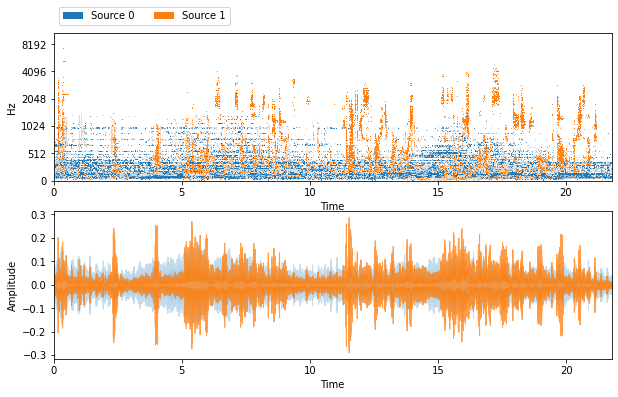


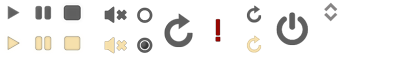
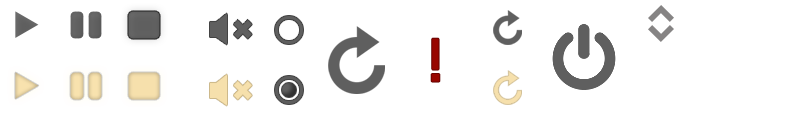
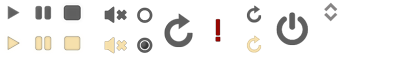

In [37]:
separator = nussl.separation.factorization.ICA(audio_signals)
estimates = separator()

estimates = {
    f'Source {i}': e for i, e in enumerate(estimates)
}

visualize_and_embed(estimates)


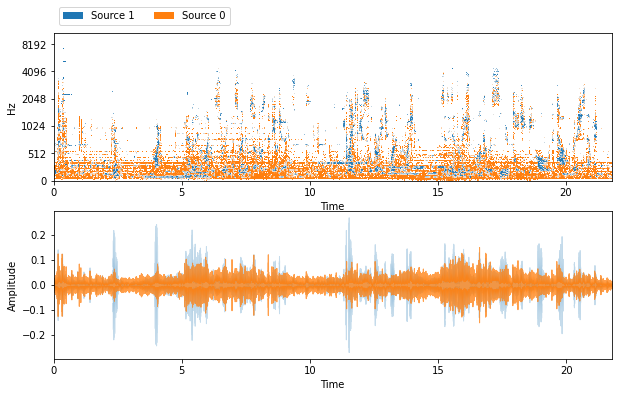


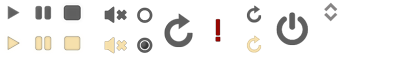
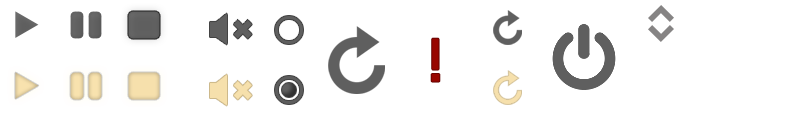
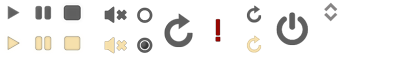

In [38]:
separator = nussl.separation.factorization.RPCA(audio_signals[0])
estimates = separator()

estimates = {
    f'Source {i}': e for i, e in enumerate(estimates)
}

visualize_and_embed(estimates)